### Seamless Bay Area Tweet Analysis: Part 2, Exploratory Data Analysis
<br>
The goal of this project is to analyze the twitter account of the nonprofit group Seamless Bay Area and determine what makes up the most high-impact tweet as measured by engagements.
<br>
<br>
In part two we perform some EDA to see what we're working with.
<br>
<br>

In [4]:
# Load necessary libraries
import pandas as pd
import numpy as np
import statistics as stat
import re
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv("/Users/grahamsmith/Documents/SpringboardWork/Seamless_Twitter_Analysis/cleaned tweets.csv")

In [11]:
#once again, here is our data for reference
df.head()

,Unnamed: 0,Tweet text,time,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks,tweet words
0,0,@MTCBATA is looking for a new Executive Direct...,2018-10-27 18:01:00,124.0,5.0,0.040323,0.0,0.0,0.0,1.0,4.0,"['@mtcbata', 'is', 'looking', 'for', 'a', 'new..."
1,1,Ultimate seamlessness. https://t.co/CdCLrg2o6a,2018-10-26 14:24:00,345.0,10.0,0.028986,0.0,0.0,1.0,0.0,9.0,"['ultimate', 'seamlessness.', 'https://t.co/cd..."
2,2,Help Nix Prop 6! Save funding for more seamles...,2018-10-26 02:28:00,994.0,19.0,0.019115,4.0,0.0,5.0,3.0,5.0,"['help', 'nix', 'prop', 'save', 'funding', 'fo..."
3,3,It doesn't have to be this way! Let's get to f...,2018-10-23 23:29:00,792.0,7.0,0.008838,2.0,0.0,4.0,1.0,0.0,"['it', ""doesn't"", 'have', 'to', 'be', 'this', ..."
4,4,And then come say hi at next month’s @SPUR_Urb...,2018-10-23 23:09:00,532.0,3.0,0.005639,0.0,0.0,1.0,2.0,0.0,"['and', 'then', 'come', 'say', 'hi', 'at', 'ne..."


<br>
Let's start with the lowest hanging fruit by checking the linear relationship between some easy to engineer features and engagements.
<br>
<br>

In [14]:
#let's make hour and minute their own columns for the regression
#for some inexplicable reason, to_csv reverts datetime objects to strings so it needs to be converted again
from datetime import datetime
temp = []
for x in range(len(df['time'])):
    temp.append(datetime.strptime(str(df['time'].iloc[x]), '%Y-%m-%d %H:%M:%S'))
df['time'] = temp

temp = []
for x in df['time']:
    temp.append(x.hour)
df['hour'] = temp

temp = []
for x in df['time']:
    temp.append(x.minute)
df['minute'] = temp

<br>
Does minute or hour have any linear relationship with engagements?
<br>
<br>

In [16]:
#check the relationship between minute of the hour and engagements
model = LinearRegression()
a = df['minute'].to_numpy()
x = a.reshape(-1, 1)
y = df['engagements']
model.fit(x,y)
r_sq = model.score(x, y)
r_sq


0.0008656056383354871

<br>
Well that's pretty bad. Let's check the components of engagements (retweets, likes, user profile clicks, and url clicks to see if they are any better)
<br>
<br>

In [96]:
#check the relationship between minute of the hour and engagements
model = LinearRegression()
a = df['minute'].to_numpy()
x = a.reshape(-1, 1)
component_cols = df.columns[6:11]
for y in component_cols:
    z = df[str(y)]
    model.fit(x,z)
    r_sq = model.score(x, z)
    print(r_sq)


0.0018227199865947785
8.042008938502487e-05
0.001384725052739677
0.002011070623837319
0.0026260684731778117


<br>
Not much better. How about for hour?
<br>
<br>

In [90]:
#check the relationship between hour of the day and engagements
model = LinearRegression()
a = df['hour'].to_numpy()
x = a.reshape(-1, 1)
y = df['engagements']
model.fit(x,y)
r_sq = model.score(x, y)
r_sq


7.496145321439496e-05

In [97]:
#check the relationship between minute of the hour and engagements
model = LinearRegression()
a = df['hour'].to_numpy()
x = a.reshape(-1, 1)
component_cols = df.columns[6:11]
for y in component_cols:
    z = df[str(y)]
    model.fit(x,z)
    r_sq = model.score(x, z)
    print(r_sq)

0.000882945640148125
4.989128501442508e-06
0.00016091964504161282
2.2368825847163265e-06
0.0002579057132280349


<br>
Pretty much as bad as the others. What about tweet length?
<br>
<br>

In [107]:
# AVERAGE NUMBER OF WORDS
y = []
for x in df['tweet words']:
    y.append(len(x))
df['tweet length'] = y
#check the relationship between hour of the day and engagements
model = LinearRegression()
a = df['tweet length'].to_numpy()
x = a.reshape(-1, 1)
y = df['engagements']
model.fit(x,y)
r_sq = model.score(x, y)
print(r_sq)
component_cols = df.columns[6:11]
for y in component_cols:
    z = df[str(y)]
    model.fit(x,z)
    r_sq = model.score(x, z)
    print(r_sq)

0.007410389451631749
0.024437843470524023
0.0129464531461011
0.021177570921540045
0.010479325696019504
0.005121774293253334


<br>
Well, it's orders of magnitude less awful than datetime, but that's not saying much. Why don't we just see how our main target variable is distributed.
<br>
<br>

In [18]:
stat.stdev(df['engagements'])

202.7709727690056

In [19]:
np.mean(df['engagements'])

41.76567363272566

In [21]:
np.median(df['engagements'])

13.0

<br>
Alright, the median is considerably lower than the mean which implies that there are some large outliers.
<br>
<br>

In [20]:
np.max(df['engagements'])

6879.0

<AxesSubplot:>

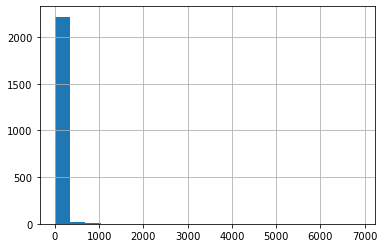

In [60]:
df['engagements'].hist(bins=20)

In [42]:
temp = []
for x in df['engagements']:
    if x > 42:
        temp.append(x)
len(temp)

444

<br>
only 20% of tweets are above the average number of engagements, which is extremely skewed on the low side. How skewed?
<br>
<br>

In [111]:
import scipy
scipy.stats.skew(df['engagements'])

24.85900650213547

<br>
oof. That's not great. But it does mean that there are some extreme outliers we can look at that might tell us something about what identifies a very successful tweet.
<br>
<br>

In [10]:
df.columns

Index(['Unnamed: 0', 'Tweet text', 'time', 'impressions', 'engagements',
       'engagement rate', 'retweets', 'replies', 'likes',
       'user profile clicks', 'url clicks', 'tweet words'],
      dtype='object')

In [36]:
sort = df.sort_values(by=['engagement rate'])
sort

,Unnamed: 0,Tweet text,time,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks,tweet words
462,28,@SomeKindaSoc @sfcta @christofspieler @SFTRU Y...,2021-09-21 23:12:00,58.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,"['@somekindasoc', '@sfcta', '@christofspieler'..."
1607,15,@Shaqapopolis Join by Telephone: 888 788 0099 ...,2021-07-26 20:23:00,14.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,"['@shaqapopolis', 'join', 'by', 'telephone:', ..."
645,38,@MosesMaynez @SFBART @transitsupply If you don...,2019-12-04 17:22:00,118.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,"['@mosesmaynez', '@sfbart', '@transitsupply', ..."
1329,52,An important read on reimagining public transi...,2022-02-09 20:23:00,385.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,"['an', 'important', 'read', 'on', 'reimagining..."
644,37,@duncank Thanks for your support! 🙏🚆🚍,2019-12-04 17:35:00,72.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,"['@duncank', 'thanks', 'for', 'your', 'support!']"
...,...,...,...,...,...,...,...,...,...,...,...,...
676,20,@r_mohtashemi @Millenniold_ @manitov @jcb10 @a...,2022-07-03 00:35:00,87.0,17.0,0.195402,0.0,0.0,3.0,1.0,0.0,"['@r_mohtashemi', '@millenniold_', '@manitov',..."
1073,35,@SFBayFerry @511SFBay We heard back from @511S...,2022-04-07 13:49:00,71.0,14.0,0.197183,2.0,0.0,3.0,1.0,0.0,"['@sfbayferry', '@511sfbay', 'we', 'heard', 'b..."
963,21,@sheeter @theGreaterMarin @transitmap @MTCBATA...,2019-08-21 17:37:00,1117.0,234.0,0.209490,2.0,1.0,6.0,11.0,63.0,"['@sheeter', '@thegreatermarin', '@transitmap'..."
1064,26,@shanand @urbanlifesigns @alex_hallowell @urbe...,2022-04-13 23:04:00,87.0,22.0,0.252874,0.0,1.0,3.0,1.0,9.0,"['@shanand', '@urbanlifesigns', '@alex_hallowe..."


In [38]:
#sort by high engagement
for x in sort['Tweet text'][0:20]:
    print(x)
    print(' ')

@SomeKindaSoc @sfcta @christofspieler @SFTRU Yes, the recording will be shared with everyone who RSVP'd (and posted on our website).
 
@Shaqapopolis Join by Telephone: 888 788 0099 (Toll Free) or 877 853 5247 (Toll Free) Webinar ID: 852 1485 5796
 
@MosesMaynez @SFBART @transitsupply If you don’t want any swag, you can just write a note when you submit your donation saying you’d don’t want any.
 
An important read on reimagining public transit for people and the climate. Good to see the @WorldResources Institute recognizing governance reforms as essential to increasing transit use. https://t.co/1A3d2WFwtV
 
@duncank Thanks for your support! 🙏🚆🚍
 
@JaceDeloney yes! t-shirt design thoughts welcome, too! 👕🚉🚍🚇
 
Abe-Koga - what brought the GMs to bring this forward now, and what induced the GMs to come up with this "preferred alternative"
 
@jarichmond Thanks so much!
 
@blinktaginc You're awesome!
 
Reminder: Tweet a Bay Area transit inspired poem by midnight tonight and tag @seamlessbaya

Hmm, highest engagement rate tweets seem to mostly be congratulations and thanks to other accounts. Maybe we should look at absolute engagement instead.
<br>
<br>

In [39]:
sort = df.sort_values(by=['engagements'])
#sort by high engagement
for x in sort['Tweet text'][0:20]:
    print(x)
    print(' ')

Can Transit Policy Save us From the Housing Crisis? https://t.co/R4Lh2bHfBK
 
@pittmaniacal Of course!
 
'Tis the season ... for the chaos of holiday travel! Wishing you all safe journeys and seamless connections, however you're planning to get to your destination 🚉🚇🚍🚲✈️

https://t.co/l3ItL4lhx3
 
@gorkermann @SFBayFerry Who is managing partner at Wilson Meany so is likely not the person taking customer service requests. https://t.co/98LSSXfEP9
 
4. Donate to Seamless Bay Area. If you are in a position to do so, your contributions will help us keep building on this momentum toward a seamless transit system. Thank you!! https://t.co/iBXbz6dKPF
 
@ecosmiley We love to hear it 👏✨
 
@marcus_ismael please come by!
 
@derivativeburke @alevin Makes sense.
 
@JaceDeloney yes! t-shirt design thoughts welcome, too! 👕🚉🚍🚇
 
@blinktaginc You're awesome!
 
You can also read our comment letter:  https://t.co/w9TjpbAB4s

For more info, please DM us!
 
@SomeKindaSoc @sfcta @christofspieler @SFTRU Yes, 

<br>
Finally! We have something interesting. The top 20 tweets all have several things in common just from a visual inspection. Nearly all feature original videos, pictures, and especially maps (the top 3 all have maps). Several have some kind of calls to action (polls, upcoming bills, or crowdfunding). We can definitely explore this in the next notebook.
<br>
<br>
I'm curious as to whether some features of engagement might be varying more significantly than other. To find out, I normalized each of the columns via maximum absolute scaling so that each value is between -1 and 1 to make direct comparison more legible.
<br>
<br>

In [150]:
stat.stdev(hi_value['retweets'] /hi_value['retweets'].abs().max())

0.07695686008030066

In [155]:
stat.stdev(hi_value['likes'] /hi_value['likes'].abs().max())

0.08795445125564791

In [152]:
stat.stdev(hi_value['replies'] /hi_value['replies'].abs().max())

0.10573012605634688

In [153]:
stat.stdev(hi_value['user profile clicks'] /hi_value['user profile clicks'].abs().max())

0.07216321519924375

In [154]:
stat.stdev(hi_value['url clicks'] /hi_value['url clicks'].abs().max())

0.06923034964668809

<br>
Darn, the standard deviations are pretty close to each other, not much to take away from that.
<br>
<br>

#### Summary
<br>
Overall results were a little dissapointing here. Our target variable (engagement) was pretty skewed, and its distribution didn't change very much between high and low value tweets. We created some simple baseline linear regressions with easy to engineer features like time tweeted or length of tweet, but none had a strong relationship with engagement.
<br>
<br>
Something we DID learn is that many of the highest value tweets included maps, and several have specific and immediate calls to action.
<br>
<br>
In the next step of the project, pre-processing, I'm going to perform some more feature engineering and extract, at the very least, links, @replies, hashtags, and sentiment score from the tweets to prepare for modeling.
<br>
<br>

In [ ]:
df.to_csv('/Users/grahamsmith/Documents/SpringboardWork/Seamless_Twitter_Analysis/cleaned tweets.csv', date_format='%Y-%m-%d %H:%M:%S')